In [160]:
Data <- read.csv(file.path("..","data","training_data.csv"))
Data <- na.omit(Data)
dim(Data)
head(Data)

[1]  708 4872

,Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,⋯,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<fct>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,low,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,⋯,0,0,1,0,1,0,1,0,1,0
2,high,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,⋯,0,0,0,0,0,0,0,0,0,0
3,high,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,⋯,0,0,1,0,1,1,1,0,1,1
4,high,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,⋯,0,0,0,0,0,0,0,0,0,0
5,low,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,⋯,0,0,0,0,0,0,0,0,0,0
6,high,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,⋯,0,0,0,0,1,0,1,0,1,0


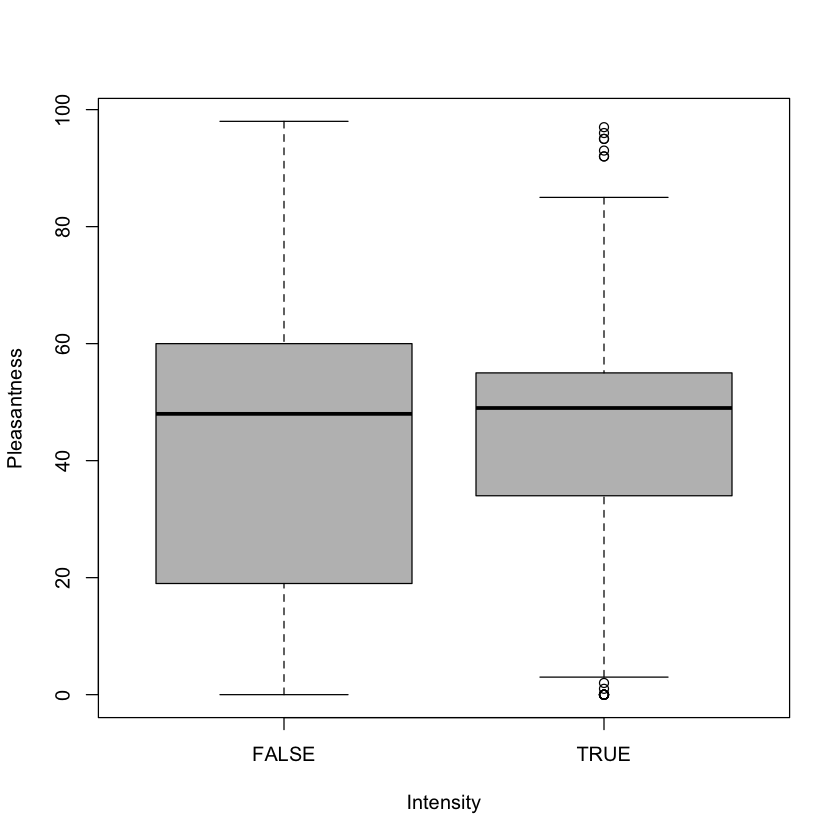

In [161]:
#plot pleasantness en fonction some features (intensity)

plot(Data$Intensity, Data$VALENCE.PLEASANTNESS, xlab='Intensity', ylab='Pleasantness', col='gray', xaxt='n', )
axis(1,c(1,2),c("FALSE","TRUE"))




In [162]:
# change the low or high Intensity to binary values 

lookup <- c("low" = 1, "high" = 0)
Data$Intensity <- lookup[Data$Intensity]
head(Data)


,Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,⋯,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,⋯,0,0,1,0,1,0,1,0,1,0
2,1,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,⋯,0,0,0,0,0,0,0,0,0,0
3,1,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,⋯,0,0,1,0,1,1,1,0,1,1
4,1,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,⋯,0,0,0,0,0,0,0,0,0,0
5,0,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,⋯,0,0,0,0,0,0,0,0,0,0
6,1,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,⋯,0,0,0,0,1,0,1,0,1,0


In [163]:
#trie des Data : statistical analysis, we remove column with var=0 and correleted ones.

library(caret)

data <- Data[, which(apply(Data, 2, var)!=0)] 

cormat<- cor(data)
highly_corr <- findCorrelation(cormat, 0.9)
data <- data[,-c(highly_corr)]
data_final<-data[, -3]
data_final<-as.data.frame(scale(data_final))

dim(data_final)
head(data_final)



[1] 708 852

,Intensity,VALENCE.PLEASANTNESS,Mi,RBF,nDB,nHet,O.,nCIR,RFD,NNRS,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.9992935,0.06138675,-0.04988752,-0.2621597,1.3212848,0.06221626,-0.2921431,2.4449733,5.4540804,-0.03056319,⋯,-0.210203,-0.07532458,4.1960309,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472
2,0.9992935,0.23351276,-0.71975646,-0.9580438,-1.1275886,-0.89537315,-0.3624004,0.2999410,-0.2222699,0.99985297,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
3,0.9992935,0.53473329,-1.32872823,0.2297583,0.0968481,1.01980567,0.3577364,1.3724571,-0.2222699,0.99985297,⋯,4.750587,-0.07532458,4.1960309,-0.05318703,2.1071008,7.6103928,2.5539556,-0.07532458,1.478546,10.80901225
4,0.9992935,-1.57381039,1.04626166,-0.6700918,0.0968481,0.06221626,1.2183877,-0.7725752,-0.2222699,-1.06097935,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
5,-0.9992935,0.31957577,-0.53706493,-0.5021197,-1.1275886,-0.89537315,-0.5029149,0.2999410,-0.2222699,0.99985297,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
6,0.9992935,-0.97136934,-0.41527058,0.8056624,0.0968481,0.06221626,-0.1165000,0.2999410,-0.2222699,0.99985297,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472


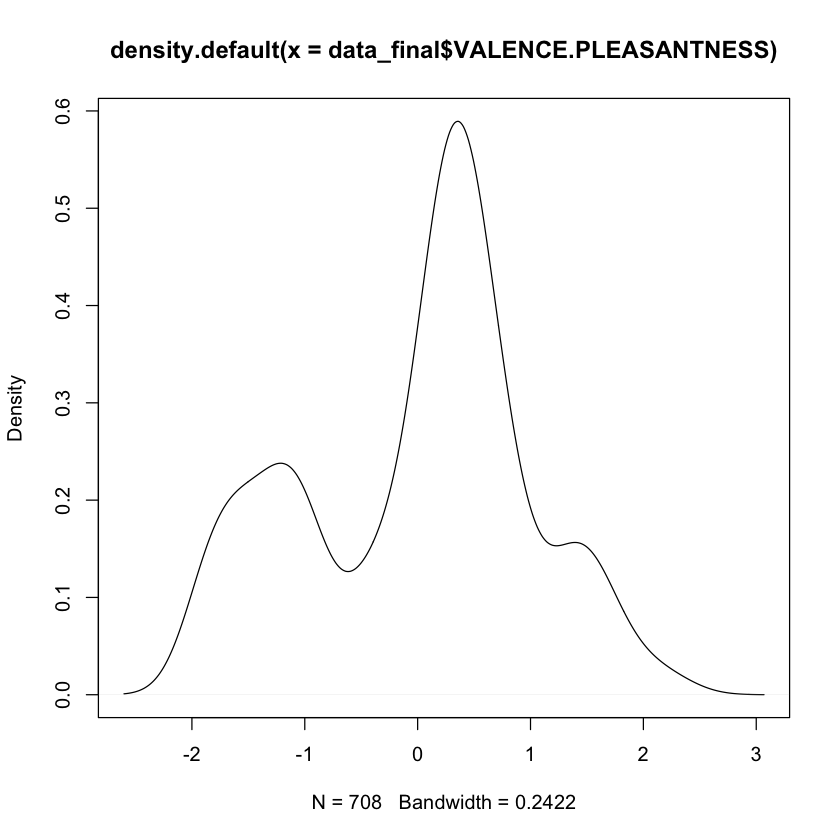

In [164]:
plot(density(data_final$VALENCE.PLEASANTNESS))

In [181]:
#creation train/test set

set.seed(1)

data.x<-(data_final[, -2])

data.y<-(data_final$VALENCE.PLEASANTNESS)
data<-cbind(data.y, data.x)

idx.train <- sample(nrow(data_final), nrow(data_final)*1/2)

X.train<- data.x[idx.train, ]
idx.zero.var <- apply(X.train, 2, var) ==0 # identify col with 0 variance 
data.train.x <- data.frame(X.train[, !idx.zero.var]) 

#c<-cor(data.train.x)
#corr <- findCorrelation(c, 0.7)
#data.train.x<-data.train.x[, -c(corr)]

data.train.y<-data.y[idx.train]
data.train<-cbind(data.train.y, data.train.x)


X.test<- data.x[-idx.train, ]
#idx.zero.var <- apply(X.test, 2, var) == 0 # identify col with =variance
data.test.x <- data.frame(X.test[, !idx.zero.var]) 

#c<-cor(data.test.x)
#corr <- findCorrelation(c, 0.7)
#data.test.x<-data.test.x[, -c(corr)]
data.test.y<-data.y[-idx.train]
data.test<-cbind(data.test.y, data.test.x)

head(data.train)
head(data.test)

dim(data.train)

dim(data.test)


,data.train.y,Intensity,Mi,RBF,nDB,nHet,O.,nCIR,RFD,NNRS,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
679,0.23351276,-0.9992935,0.4981871,1.6815165,0.0968481,-0.89537315,-0.7839439,-0.7725752,-0.2222699,-1.060979,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
129,0.40563878,-0.9992935,0.9244673,1.0096284,-1.1275886,-0.89537315,-0.5556078,-0.7725752,-0.2222699,-1.060979,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
509,0.01835525,-0.9992935,-0.9024480,-0.5501117,0.0968481,-0.89537315,-0.5380435,0.2999410,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,1.478546,-0.09238472
471,-0.02467626,-0.9992935,-1.3287282,-0.8860558,0.0968481,-0.89537315,-0.2570145,0.2999410,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
299,0.14744976,0.9992935,-0.4152706,-0.9580438,0.0968481,0.06221626,-0.3624004,0.2999410,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
270,0.79292231,0.9992935,-0.4152706,-0.9940378,-1.1275886,0.06221626,0.4631223,0.2999410,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472


,data.test.y,Intensity,Mi,RBF,nDB,nHet,O.,nCIR,RFD,NNRS,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,-1.5738104,0.9992935,1.0462617,-0.6700918,0.0968481,0.06221626,1.2183877,-0.7725752,-0.2222699,-1.060979,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
5,0.3195758,-0.9992935,-0.5370649,-0.5021197,-1.1275886,-0.89537315,-0.5029149,0.2999410,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
6,-0.9713693,0.9992935,-0.4152706,0.8056624,0.0968481,0.06221626,-0.1165000,0.2999410,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472
7,0.5347333,-0.9992935,-1.9985972,-0.5981038,-1.1275886,-0.89537315,-0.5380435,1.3724571,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,2.1071008,-0.1312137,-0.3909965,-0.07532458,1.478546,-0.09238472
8,0.3626073,-0.9992935,0.7417758,0.8056624,-1.1275886,-1.85296256,-1.2933090,-0.7725752,-0.2222699,-1.060979,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
9,0.4056388,-0.9992935,0.5590842,-0.2261657,3.7701582,4.85016332,1.2183877,0.2999410,-0.2222699,0.999853,⋯,4.750587,-0.07532458,4.1960309,-0.05318703,2.1071008,7.6103928,2.5539556,13.25712685,1.478546,10.80901225


[1] 354 845

[1] 354 845

Now let's run on data.train

--> R trop bas, ne prenons pas les donne issus de la regression

checkons linear regression with the 845 predictor

In [194]:
    
fit1<-lm(data.train.y~., data.train)
#summary(fit1)


quality.of.fit <- function(fit, data) {
    RSS <- sum((data[, 1]- predict(fit, data))^2)
    TSS <- sum((data[, 1]- mean(data[, 1]))^2)
    cat(c("Residual standard error: ",
          sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}

#quality.of.fit(fit1, data.train)
#quality.of.fit(fit1, data.test)



#Creeons % submodel . 


x1<-data.train.x[, 1:169]
x2<-data.train.x[, 169:228]
x3<-data.train.x[, 228:507]
x4<-data.train.x[, 507:676]
x5<-data.train.x[, 676:844]

fit1<-lm(data.train.y~., x1)
fit2<-lm(data.train.y~., x2)
fit3<-lm(data.train.y~., x3)
fit4<-lm(data.train.y~., x4)
fit5<-lm(data.train.y~., x5)
         
summary(fit1)
summary(fit2)
summary(fit3)
summary(fit4)
summary(fit5)

quality.of.fit(fit1, data.train)
quality.of.fit(fit2, data.test)




Call:
lm(formula = data.train.y ~ ., data = x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.23514 -0.40460 -0.00504  0.38559  2.11956 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.237586   0.216014  -1.100  0.27283   
Intensity    -0.009600   0.055213  -0.174  0.86215   
Mi            1.752551   1.742577   1.006  0.31587   
RBF           0.709590   1.035665   0.685  0.49411   
nDB           0.334280   0.592869   0.564  0.57355   
nHet         -3.338388   2.233653  -1.495  0.13674   
O.            2.570346   1.496591   1.717  0.08758 . 
nCIR          1.372366   3.396760   0.404  0.68667   
RFD          -0.742596   1.524828  -0.487  0.62684   
NNRS          0.829148   2.144756   0.387  0.69950   
nR04          0.377968   0.246115   1.536  0.12632   
nR06          1.817749   2.494963   0.729  0.46719   
nR10         -1.038428   0.724802  -1.433  0.15364   
ARR           0.148000   1.338945   0.111  0.91211   
D.Dtr05       0.360330


Call:
lm(formula = data.train.y ~ ., data = x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.44658 -0.56305  0.04994  0.59199  2.11410 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -9.313e+01  1.148e+02  -0.811  0.41779   
GGI8          -3.152e-01  1.561e-01  -2.019  0.04440 * 
GGI9           3.916e-01  2.548e-01   1.537  0.12542   
GGI10         -1.579e-01  2.514e-01  -0.628  0.53048   
JGI2          -9.606e-02  1.837e-01  -0.523  0.60141   
JGI3           5.628e-02  9.952e-02   0.566  0.57215   
JGI4          -5.109e-02  9.087e-02  -0.562  0.57437   
JGI5           1.117e-02  7.680e-02   0.145  0.88448   
JGI6           1.656e-01  7.286e-02   2.273  0.02376 * 
JGI7           3.934e-02  7.437e-02   0.529  0.59726   
JGI8           1.824e-01  1.107e-01   1.648  0.10050   
JGI9          -1.662e-01  1.499e-01  -1.109  0.26836   
JGI10          1.142e-02  1.221e-01   0.094  0.92556   
SpMax1_Bh.p.   4.947e-01  3.326e-01   1.488  0.1


Call:
lm(formula = data.train.y ~ ., data = x3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.31246 -0.04303  0.00000  0.04303  1.31246 

Coefficients: (32 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)       2.68314    2.48633   1.079   0.2830  
SpMAD_EA.ri.    -45.58535   37.45757  -1.217   0.2263  
SpMaxA_AEA.dm.  -31.10816   21.74348  -1.431   0.1555  
SpDiam_AEA.dm.   -5.12938   13.81838  -0.371   0.7112  
SpMAD_AEA.dm.    28.37841   20.09067   1.413   0.1608  
Chi1_EA.dm.     -14.62065   12.38654  -1.180   0.2405  
SM15_EA.bo.     -24.90593   21.35480  -1.166   0.2461  
SM15_EA.dm.       0.59901    7.48010   0.080   0.9363  
Eig02_EA.ed.     -0.25530    8.08636  -0.032   0.9749  
Eig06_EA.ed.    -14.48326   10.31944  -1.403   0.1634  
Eig05_EA.bo.     -5.43391    5.57115  -0.975   0.3316  
Eig02_EA.dm.     10.66009   10.88806   0.979   0.3298  
Eig03_EA.dm.     15.19844   15.12721   1.005   0.3173  
Eig04_


Call:
lm(formula = data.train.y ~ ., data = x4)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7826 -0.4643  0.0000  0.4177  1.7018 

Coefficients: (3 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)    -0.948159   0.802971  -1.181  0.23918   
HATS4p         -0.394686   1.175453  -0.336  0.73742   
HATS5p          1.034134   1.272437   0.813  0.41742   
HATS6p         -1.056039   1.114793  -0.947  0.34472   
HATS7p         -0.739094   1.333301  -0.554  0.58002   
H0i            -0.104134   0.813175  -0.128  0.89824   
H3i             0.619106   0.640179   0.967  0.33476   
H5i             0.208977   0.508585   0.411  0.68162   
H6i             0.958135   0.459655   2.084  0.03848 * 
H7i             0.231782   0.288896   0.802  0.42340   
H8i             0.348263   0.361802   0.963  0.33701   
HATS3i          1.332467   1.031892   1.291  0.19821   
HATS5i         -0.179006   0.796747  -0.225  0.82248   
HATS6i          0


Call:
lm(formula = data.train.y ~ ., data = x5)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7579 -0.4203  0.0000  0.4386  2.0851 

Coefficients: (16 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)    2.574e-01  3.244e-01   0.793  0.42854   
SsNH2          1.175e+00  6.921e-01   1.698  0.09097 . 
SaaN           2.813e+00  1.286e+00   2.188  0.02980 * 
SsOH           7.719e-01  7.294e-01   1.058  0.29123   
SaaO           6.413e-02  2.049e-01   0.313  0.75467   
SsSH          -9.145e+00  9.403e+00  -0.973  0.33192   
NsCH3         -2.569e-01  2.765e-01  -0.929  0.35393   
NdCH2         -1.492e-01  1.123e-01  -1.329  0.18546   
NdsCH         -1.693e-01  9.586e-02  -1.766  0.07889 . 
NsssCH         3.865e-01  2.130e-01   1.815  0.07108 . 
NdssC          5.266e-01  2.427e-01   2.169  0.03125 * 
NaasC          5.017e-01  2.887e-01   1.738  0.08374 . 
NssssC         1.873e-01  2.202e-01   0.850  0.39610   
NssNH          3

Residual standard error:  0.885479880644144  R^2 =  0.595120991448089 
Residual standard error:  2723.2416071476  R^2 =  -6200173.47660291 


--> l'algorithme ne converge pas.. Essaysons lassos regularization

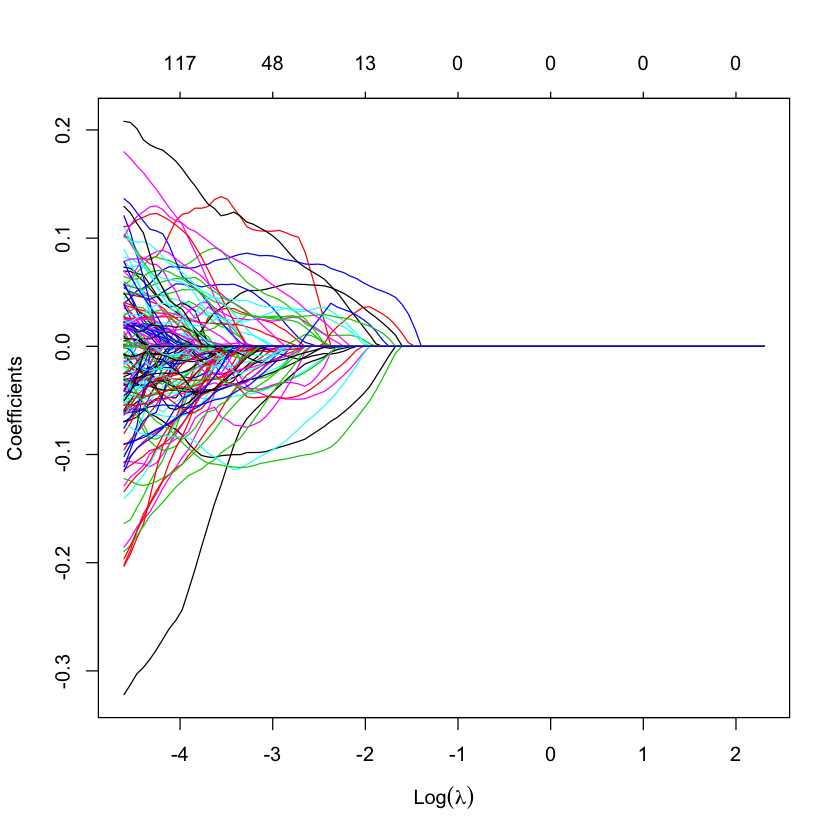

In [171]:
library(glmnet)
grid =10^seq(1, -2, length = 100)

x.train<-as.matrix(data.train.x)
x.test<-as.matrix(data.test.x)

lasso.mod <- glmnet(x.train, data.train.y, alpha = 1, lambda = grid)
plot(lasso.mod, "lambda", xlab = parse(text = "Log(lambda)"))

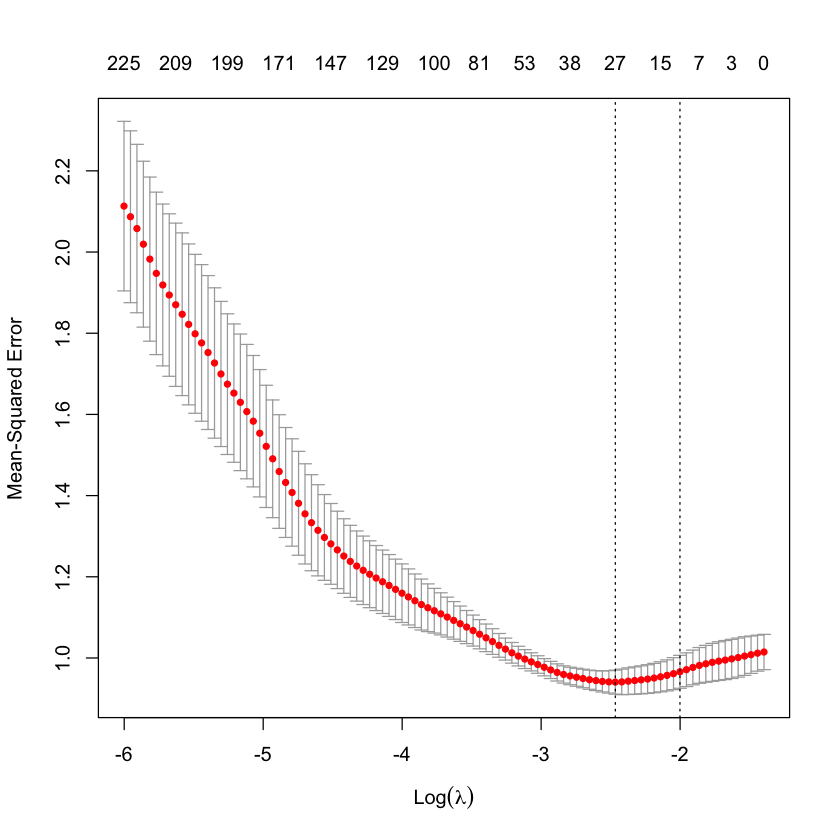

In [172]:
cv.lasso <- cv.glmnet(x.train, data.train.y, alpha = 1, nfold = 5)
plot(cv.lasso)

In [173]:
best.lasso <- glmnet(x.train, data.train.y, alpha = 1, lambda = cv.lasso$lambda.min)
bestlam = cv.lasso$lambda.min

lasso_pred = predict(lasso.mod, s = bestlam, newx = x.test)
mean((lasso_pred-data.test.y)^2)

[1] 0.8964184

**INTERPRETATION :**


The coefficient found are much smaller than the ones with multilinear regression 

In [25]:
#LASSO L2-REGULARIZATION 

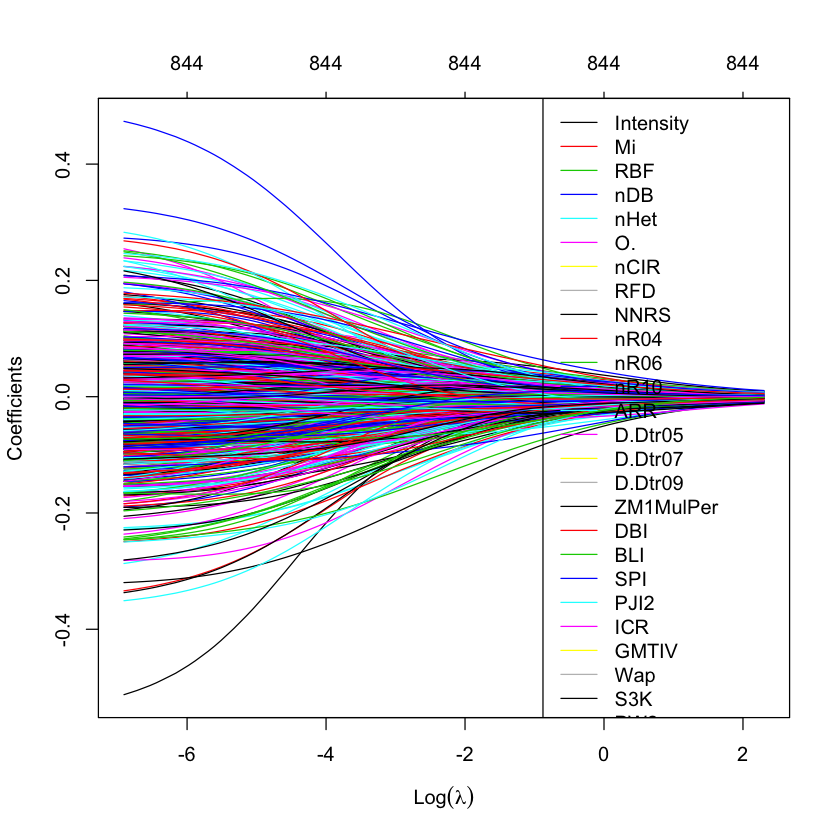

In [174]:

ridge.mod <- glmnet(x.train, data.train.y, alpha = 0, lambda = 10^seq(1, -3, length = 100))
plot(ridge.mod, "lambda", xlab = parse(text = "Log(lambda)"))
labs = names(ridge.mod$beta[,1]) # extract labels
legend('topright', legend=labs, col=1:length(labs), lty=1) # show legend with labels

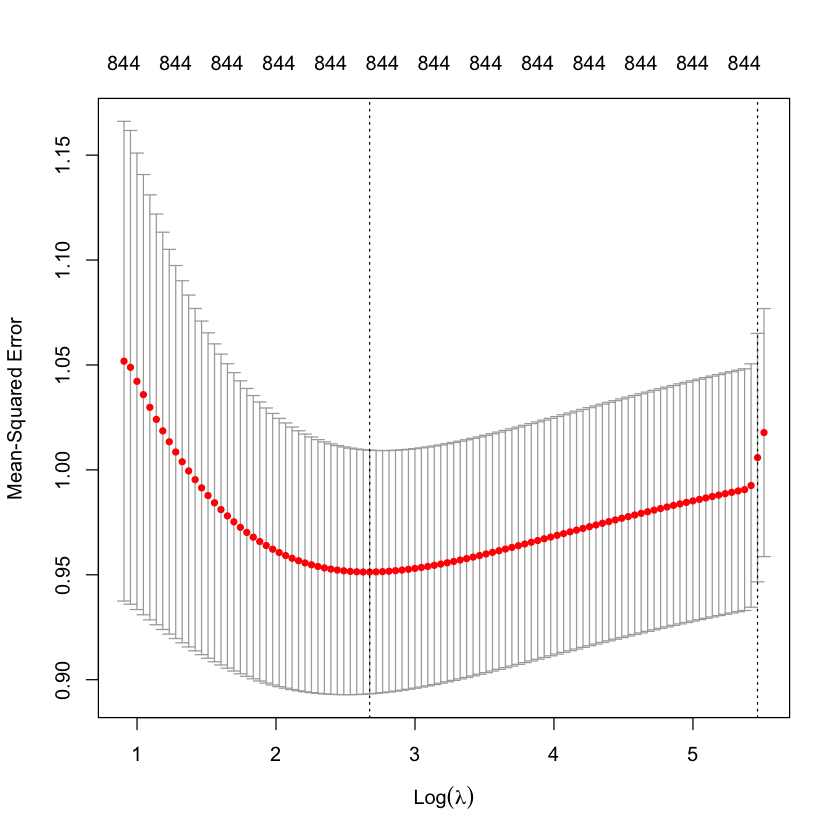

In [175]:
cv.lasso2 <- cv.glmnet(x.train, data.train.y,  alpha = 0, nfold = 50)
plot(cv.lasso2)


In [176]:
bestlam2 = cv.lasso2$lambda.min
best.lasso.1se <- glmnet(x.train, data.train.y, alpha = 0, lambda = bestlam2)


In [177]:
ridge_pred = predict(ridge.mod,  s = bestlam, newx = x.test)
mean((ridge_pred-data.test.y)^2)


[1] 1.066901

--> lasso donne meilleur resultats 

PCA

In [142]:
prin_comp <- prcomp(data.train.x, scale. = T)
summary(prin_comp)

Importance of components:
                           PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     11.4907 9.5568 8.28188 6.59664 5.68290 5.10259 4.93991
Proportion of Variance  0.1564 0.1082 0.08127 0.05156 0.03826 0.03085 0.02891
Cumulative Proportion   0.1564 0.2647 0.34592 0.39748 0.43575 0.46660 0.49551
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     4.66841 4.42823 4.20385 3.96953 3.86270 3.50329 3.45779
Proportion of Variance 0.02582 0.02323 0.02094 0.01867 0.01768 0.01454 0.01417
Cumulative Proportion  0.52133 0.54456 0.56550 0.58417 0.60185 0.61639 0.63056
                          PC15    PC16    PC17    PC18   PC19    PC20    PC21
Standard deviation     3.33979 3.25089 3.09279 3.02391 2.9057 2.86720 2.81769
Proportion of Variance 0.01322 0.01252 0.01133 0.01083 0.0100 0.00974 0.00941
Cumulative Proportion  0.64377 0.65630 0.66763 0.67846 0.6885 0.69821 0.70761
                          PC22    

In [157]:
#add a training set with principal components
train.data <- data.frame(pleasantness = data.train.y, prin_comp$x)

#we are interested in first 60 PCAs

train.data <- train.data[,1:60]

linearmod<-lm(pleasantness ~., train.data)

#transform test into PCA


test.data <- predict(prin_comp, data.test)
test.data <- data.frame(pleasantness = data.test.y, test.data)


#select the first 60 components
test.data <- test.data[,1:60]


rpart.prediction <- predict(linearmod, test.data)


quality.of.fit <- function(fit, data) {
    RSS <- sum((data$pleasantness - predict(fit, data))^2)
    TSS <- sum((data$pleasantness- mean(data$pleasantness))^2)
    cat(c("Residual standard error: ",
          sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}

quality.of.fit(linearmod, train.data)
quality.of.fit(linearmod, test.data)


#training error  : 
1/length(train.data$pleasantness) * sum((train.data$pleasantness-rpart.prediction )^2)




Residual standard error:  0.92171416047173  R^2 =  0.299045397154683 
Residual standard error:  1.04265281009458  R^2 =  0.0880086704142322 


[1] 1.274407

--> lasso donne de meilleur resultat